In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
path=r"C:\Users\jagar\Documents\Visadataset.csv"
visa_df=pd.read_csv(path)
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [3]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- We have two types of sacling
    - Z score(standardization)
    - min max scaler (Normalization)

In [15]:
# step-1: read pwag column x
# step-2: calculate mean pwag
# step-3: calculate std of wage
# step-4: pwag-mean
# step-5: visa_df[p_z]  step4/step3
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_std=wage_data.std()
visa_df['prevailing_wage_z']=(wage_data-wage_mean)/wage_std

In [16]:
visa_df[['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

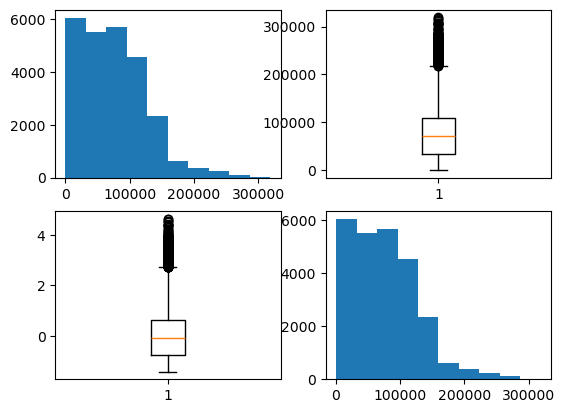

In [17]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).boxplot(visa_df['prevailing_wage_z'])
plt.subplot(2,2,4).hist(visa_df['prevailing_wage'])

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df['prevailing_wage_ss']=ss.fit_transform(visa_df[['prevailing_wage']])

In [19]:
visa_df[['prevailing_wage','prevailing_wage_z','prevailing_wage_ss']]

,prevailing_wage,prevailing_wage_z,prevailing_wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


**Normalization**

In [9]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [10]:
# step-1: read pwag column x
# step-2: calculate min pwag
# step-3: calculate max of wage
# step-4: pwag-min
# step-5: visa_df[p_z]  step4/step3
X=visa_df['prevailing_wage']
wage_min=X.min()
wage_max=X.max()
visa_df['prevailing_wage_z']=(X-wage_min)/(wage_max-wage_min)

In [11]:
visa_df[['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

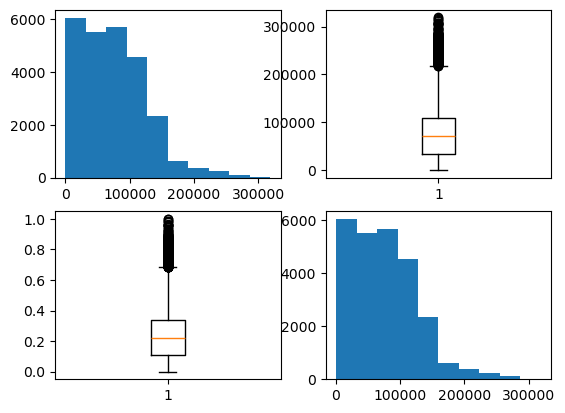

In [12]:
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).boxplot(visa_df['prevailing_wage_z'])
plt.subplot(2,2,4).hist(visa_df['prevailing_wage'])

**sklearn**

- preprocessing
- standarding
- import the method
- save the method
- apply fit transform

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df['prevailing_wage_ss']=ss.fit_transform(visa_df[['prevailing_wage']])

In [20]:
visa_df[prevailing_wage,prevailing_wage'prevailing_wage_ss']

SyntaxError: invalid syntax (3333385880.py, line 1)